<a href="https://colab.research.google.com/github/AdrianoCost/data-analytics_notebooks/blob/main/analise_alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Sobre o conjunto de dados</strong></h1>
<p>Este conjunto de dados contém informações de saúde abrangentes para 2.149 pacientes, cada um identificado exclusivamente com IDs variando de 4751 a 6900. O conjunto de dados inclui detalhes demográficos, fatores de estilo de vida, histórico médico, medidas clínicas, avaliações cognitivas e funcionais, sintomas e um diagnóstico da doença de Alzheimer.</p><p> Os dados são ideais para pesquisadores e cientistas de dados que buscam explorar fatores associados à doença de Alzheimer, desenvolver modelos preditivos e conduzir análises estatísticas.</p>

---




In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df.drop(['DoctorInCharge','PatientID'],axis=1)

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


<h2>Comparação entre fumantes e não fumantes diagnosticados com <strong>Alzheimer</strong></h2>

---





In [ ]:
def classify_smoking(row):
    '''
      Classifica se a pessoa é fumante ou não fumante
    '''
    if row['Smoking'] == 1:
        return 'fumante'
    else:
        return 'Não fumante'

df['Smoking'] = df.apply(classify_smoking,axis=1)

In [ ]:
cont = df['Smoking'].value_counts()

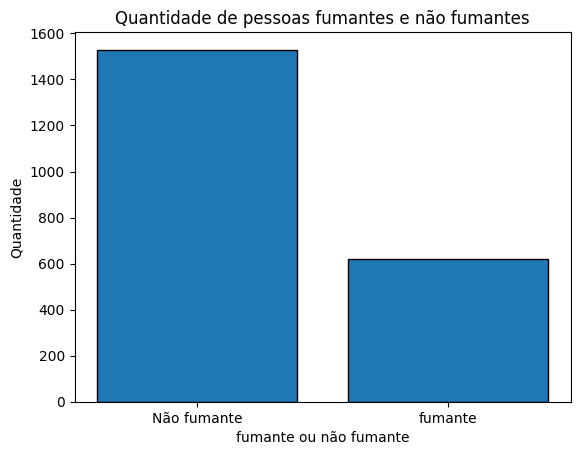

In [ ]:

plt.bar(cont.index,cont.values,edgecolor='black')
plt.xlabel("fumante ou não fumante")
plt.ylabel('Quantidade')
plt.title('Quantidade de pessoas fumantes e não fumantes')
plt.show()

<h2>Classificando o grau de obesidade dos pacientes</h2>
* Menor que 18,5	abaixo

* 18,5 a 24,9	Normal
* 25 a 29,9	Sobrepeso
* 30 a 34,9	Obesidade grau I
* 35 a 39,9	Obesidade grau II
* Maior que 40	Obesidade grau III
---



In [ ]:
def classify_bmi(row):
    '''
      Classifica o grau de obesidade de quem foi diagnosticado com alzheimer
    '''
    bmi = row['BMI']
    if bmi < 18.5:
        return 'Abaixo'
    elif 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25 <= bmi <= 29.9:
        return 'sobrepeso'
    elif 30 <= bmi <= 34.9:
        return 'Obesidade 1'
    elif 35 <= bmi <= 39.9:
        return 'Obesidade 2'
    else:
        return 'Obesidade 3'

df['BMI'] = df.apply(classify_bmi,axis=1)

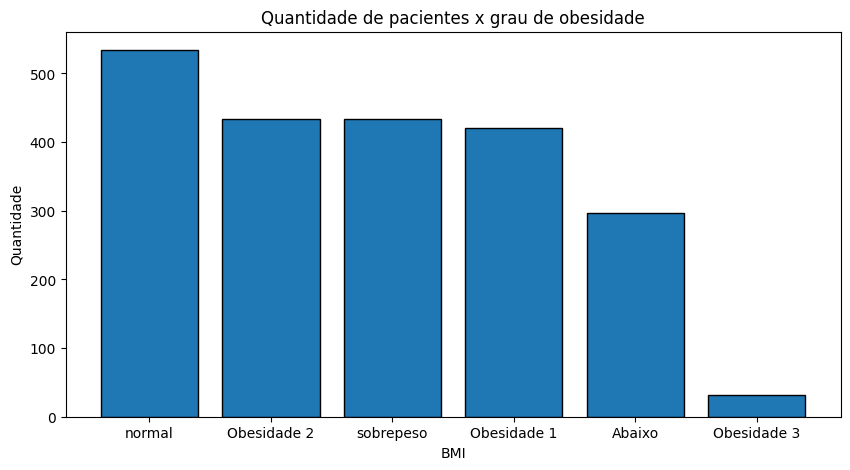

In [ ]:
plt.figure(figsize=(10,5))
cont = df['BMI'].value_counts()
plt.bar(cont.index,cont.values,edgecolor='black')
plt.xlabel("BMI")
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes x grau de obesidade')
plt.show()

<h2>Classificando a quantidade de horas semanais dedicadas a atividades físicas.</h2>

* 0 a 2,5 horas (0 a 150 minutos): Sedentário
* 2,5 a 5 horas (150 a 300 minutos): Ativo
* Mais de 5 horas (300 minutos): Muito Ativo

---



In [ ]:
def classify_physical_activity(row):
    '''
      Classifica a quantidade de horas semanais dedicadas a atividades físicas.
    '''
    if row['PhysicalActivity'] <= 2.5:
        return "Sedentário"
    elif row['PhysicalActivity'] <= 5:
        return "Ativo"
    else:
        return "Muito Ativo"

In [ ]:
df['PhysicalActivity'] = df.apply(classify_physical_activity,axis=1)
classify_activ = df['PhysicalActivity'].value_counts()

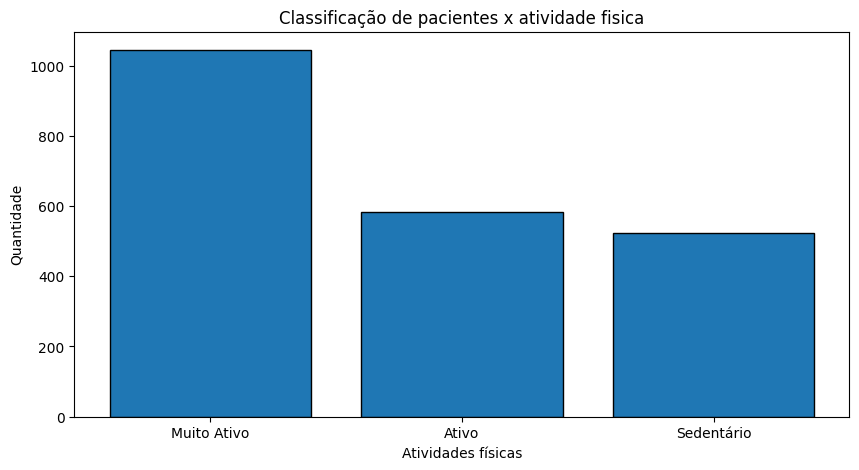

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(classify_activ.index,classify_activ.values,edgecolor='black')
plt.xlabel("Atividades físicas")
plt.ylabel('Quantidade')
plt.title('Classificação de pacientes x atividade fisica')
plt.show()

In [ ]:
age_counts = df['Age'].value_counts()

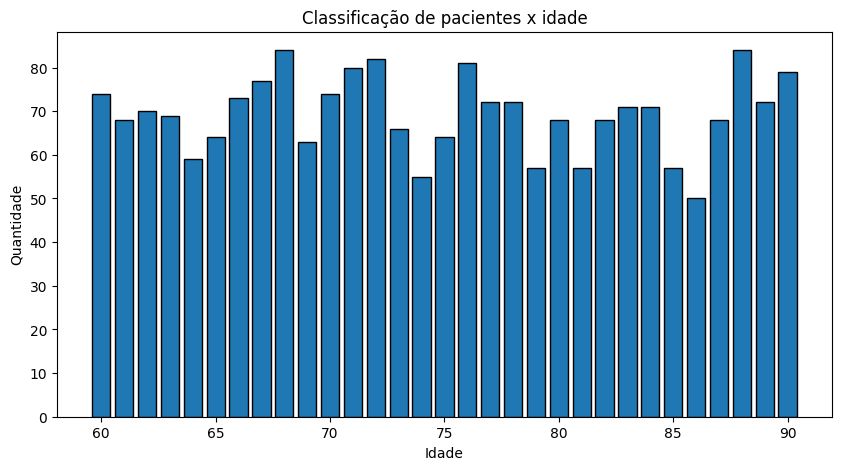

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(age_counts.index,age_counts.values,edgecolor='black')
plt.xlabel("Idade")
plt.ylabel('Quantidade')
plt.title('Classificação de pacientes x idade')
plt.show()

<h2>Calculando a média e a mediana de idade dos pacientes</h2>


In [ ]:
df['Age'].mean().round()


75.0

In [ ]:
df['Age'].median().round()

75.0

<h2>Buscando a correlação entre as variaveis



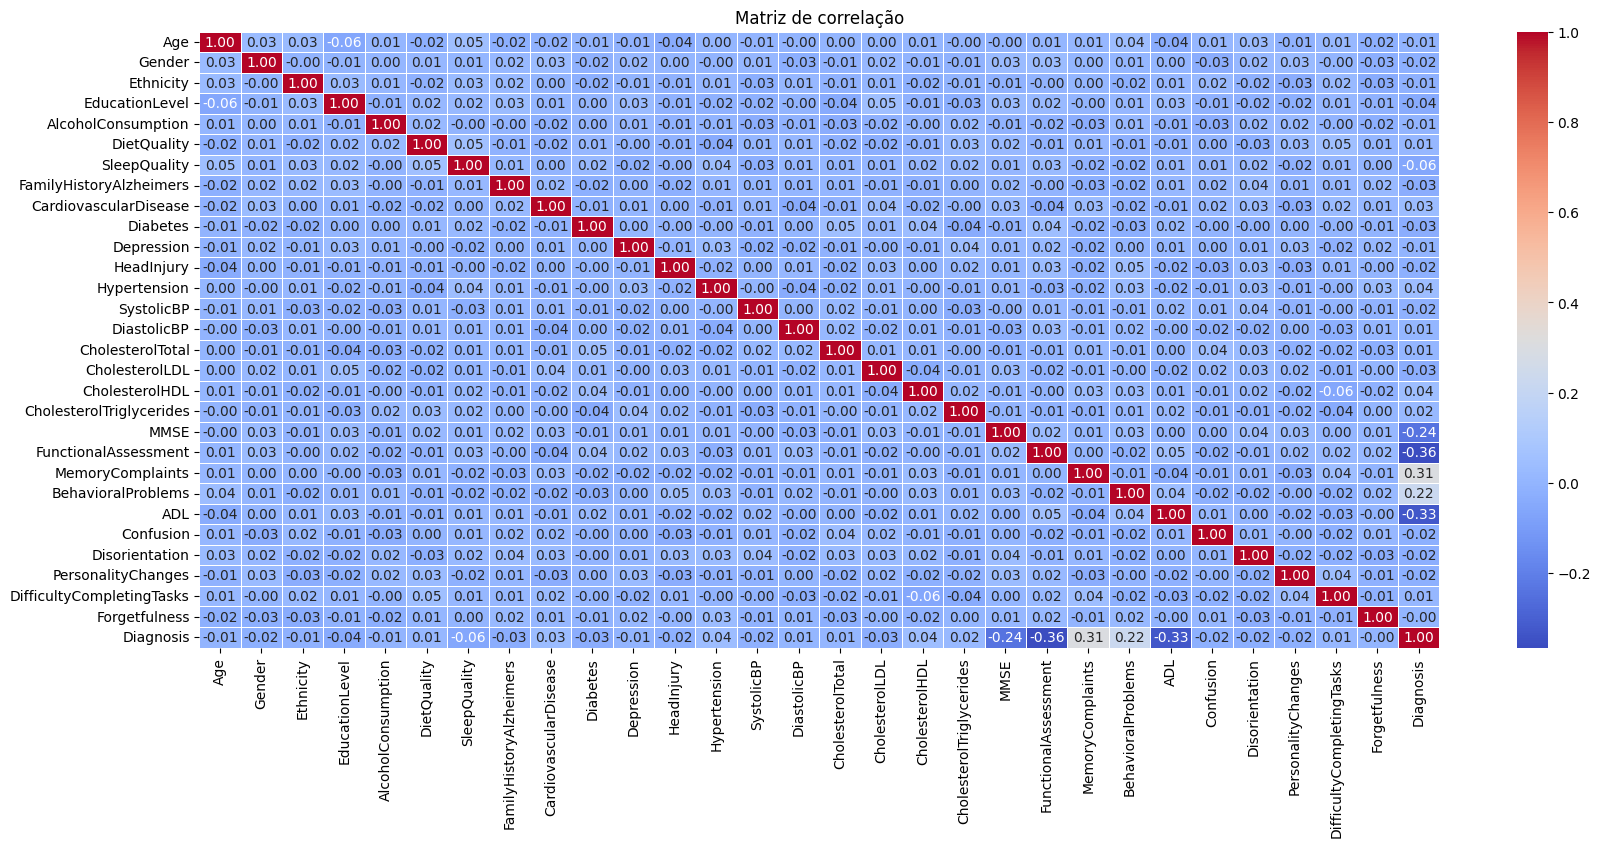

In [ ]:

numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' ,fmt=".2f", linewidths=.6)
plt.title('Matriz de correlação')
plt.show()

* correlação  positiva moderada entre MemoryComplaints (Presença de queixas de memória) e diagnostico de Alzheimer
* correlação negativa moderada entre FunctionalAssessment(Avaliação funcional) e diagnostico de alzheimer
